## Predict

In [ ]:
import os
import string
import numpy as np
from PIL import Image
from pickle import dump, load
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model, load_model

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
model=load_model("resnet.h5")

In [ ]:
with open('tokenizer.pkl', 'rb') as file:
    tokenizer = load(file)

In [21]:
caption_model_new= load_model('img_caption_model_Attention.keras')

In [12]:
caption_model= load_model('img_caption_model_resnet.keras')

In [13]:
def generate_desc(model, tokenizer, photo, max_length):
    in_text = 'startseq'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=31, padding='post', truncating='post')
        photo_reshaped = photo.reshape(1, photo.shape[1])
        yhat = model.predict([photo_reshaped,sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = tokenizer.index_word.get(yhat)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'endseq':
            break
    return in_text

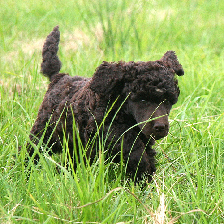

In [28]:
filename = "/content/1361420539_e9599c60ae.jpg"
image = load_img(filename, target_size=(224, 224))
image

In [29]:

image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

feature = model.predict(image, verbose=0)


In [30]:
description = generate_desc(caption_model, tokenizer, feature, 20)
print(description)

startseq two black dogs run in field endseq


In [31]:
description = generate_desc(caption_model_new, tokenizer, feature, 30)
print(description)

startseq two black dogs are running through the grass endseq


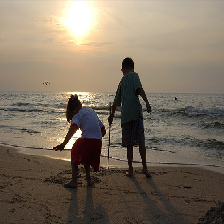

In [36]:
filename = "/content/1322323208_c7ecb742c6.jpg"
image = load_img(filename, target_size=(224, 224))
image

In [37]:
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

feature_1 = model.predict(image, verbose=0)


In [38]:
description = generate_desc(caption_model, tokenizer, feature_1, 20)
print(description)

startseq two people walk int the beach endseq


In [39]:
description = generate_desc(caption_model_new, tokenizer, feature_1, 30)
print(description)

startseq two girls walk along the beach endseq


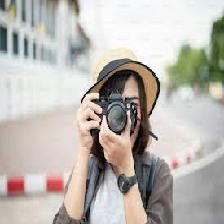

In [24]:
filename = "/content/download.jpeg"
image = load_img(filename, target_size=(224, 224))
image

In [25]:
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

feature_1 = model.predict(image, verbose=0)

In [26]:
description = generate_desc(caption_model, tokenizer, feature_1, 20)
print(description)

startseq man in blue jacket is pushing his hand of his beard endseq


In [27]:
description = generate_desc(caption_model_new, tokenizer, feature_1, 30)
print(description)

startseq man in suit and man with camera endseq
